In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ----------------- Data Loading -----------------
print('Loading data...')

data_path = '../data/original/train.csv'
df = pd.read_csv(data_path)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=314)

final_train_df = df.copy()

predictive_path = '../data/original/predictive.csv'
predictive_df = pd.read_csv(predictive_path)

processed_train_csv_path = '../data/processed/4_pca/train.csv'
processed_test_csv_path = '../data/processed/4_pca/test.csv'
processed_final_train_csv_path = '../data/processed/4_pca/final_train.csv'
processed_predictive_csv_path = '../data/processed/4_pca/predictive.csv'

processed_train_df = pd.read_csv(processed_train_csv_path)
processed_test_df = pd.read_csv(processed_test_csv_path)
processed_final_train_df = pd.read_csv(processed_final_train_csv_path)
processed_predictive_df = pd.read_csv(processed_predictive_csv_path)

df = processed_train_df.copy()

Loading data...


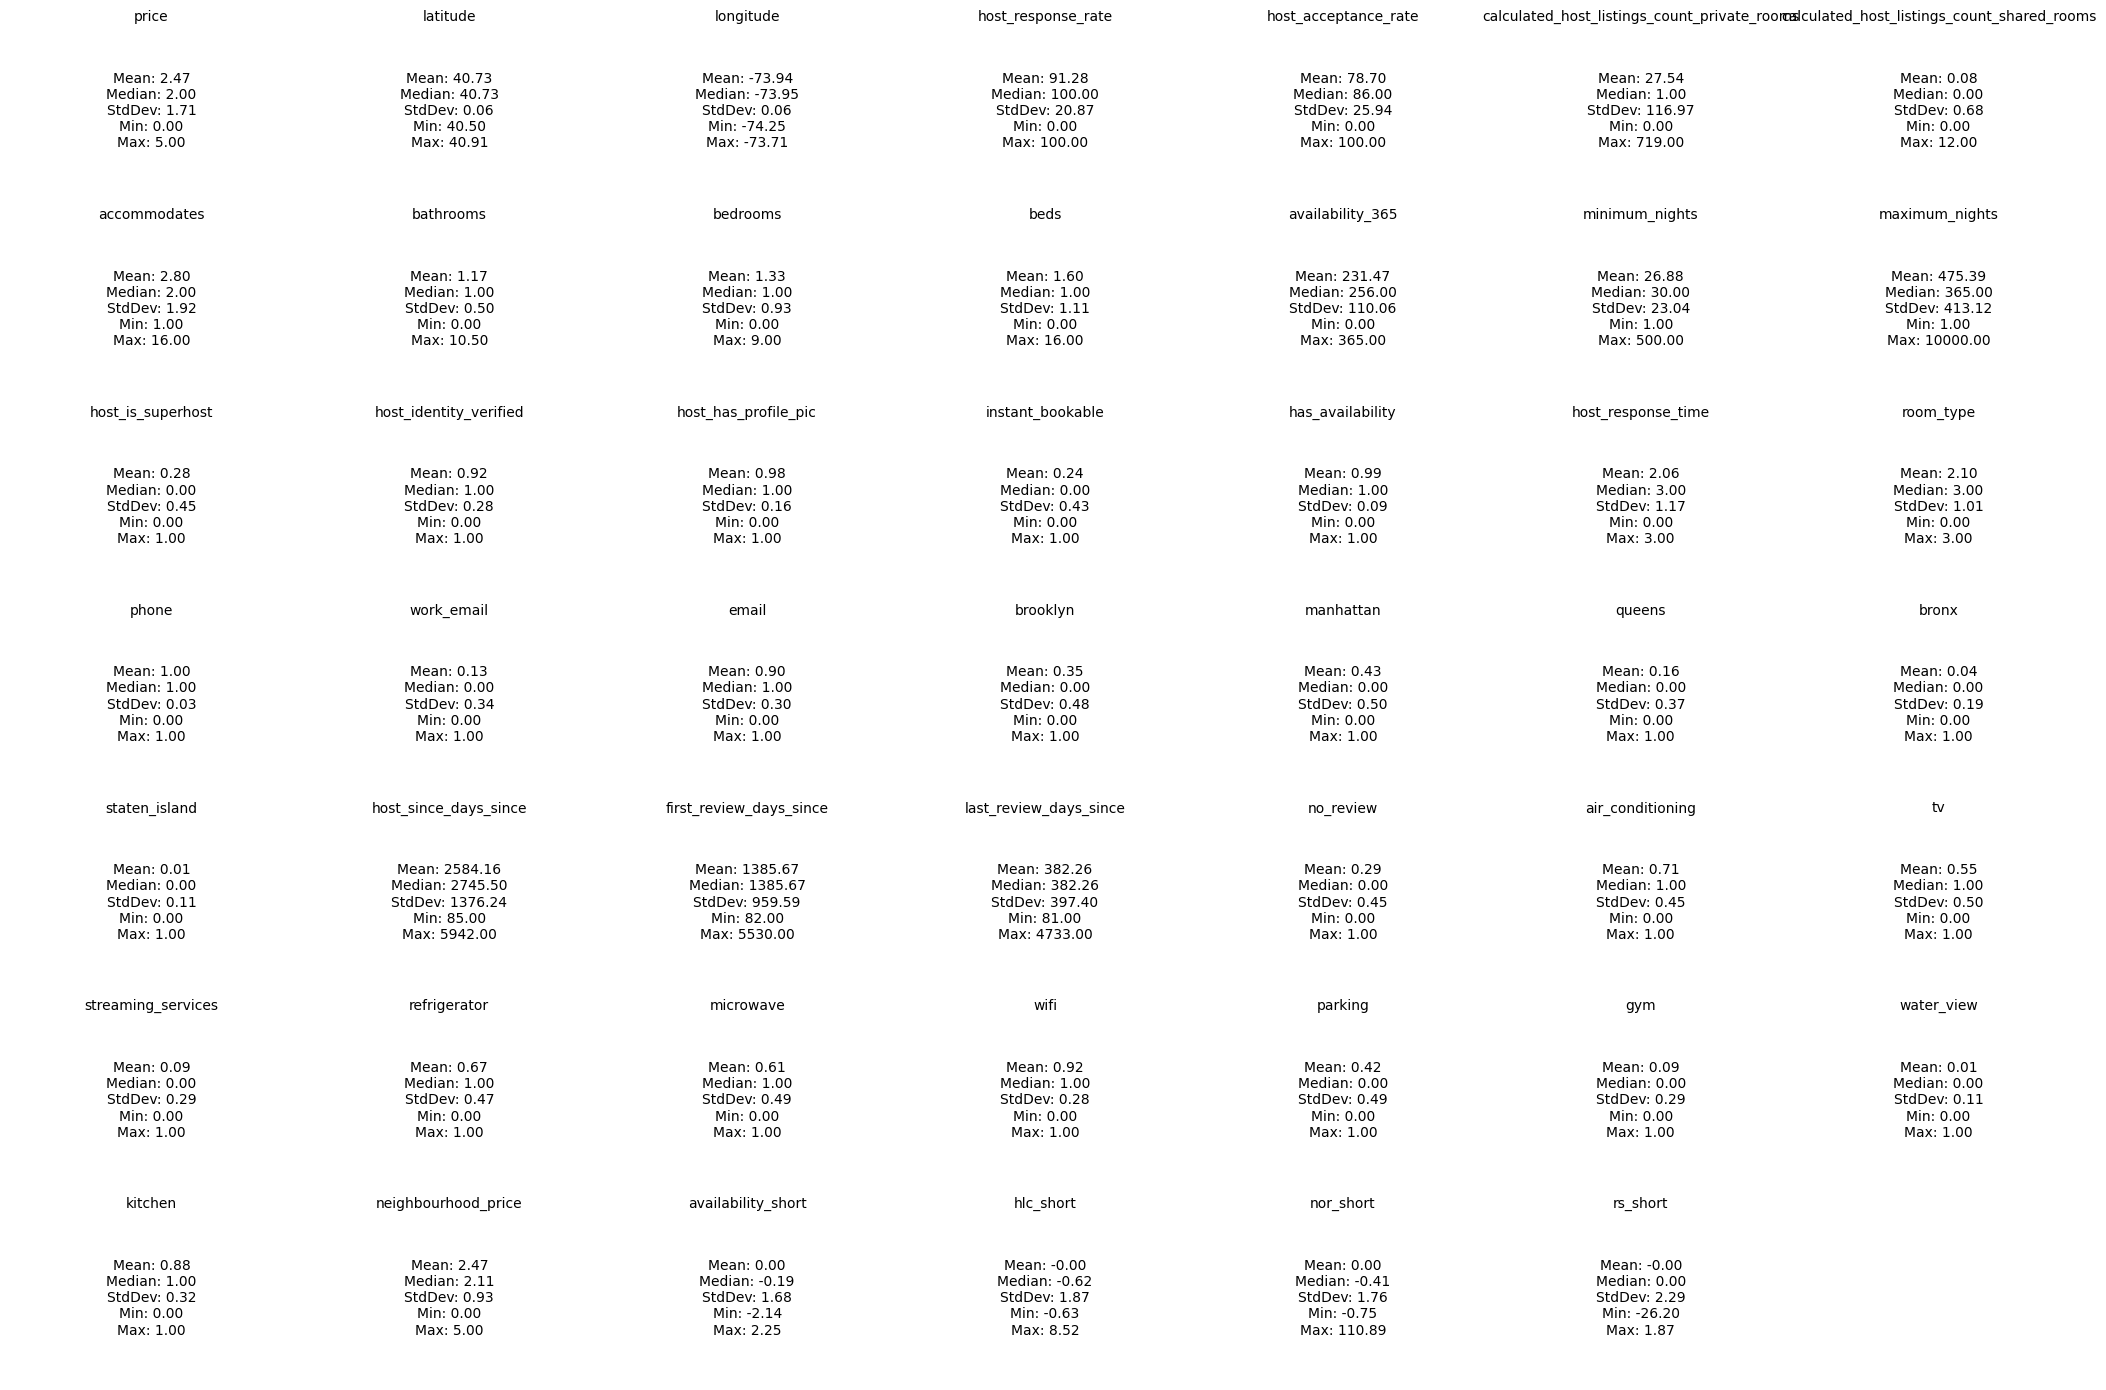

In [6]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
num_plots = len(numeric_columns)
plots_per_row = 7
num_full_rows = num_plots // plots_per_row
remaining_plots = num_plots % plots_per_row
total_rows = num_full_rows + (1 if remaining_plots > 0 else 0)

fig, axes = plt.subplots(total_rows, plots_per_row, figsize=(plots_per_row*3, total_rows*2))
axes = axes.flatten()

for idx, column in enumerate(numeric_columns):
    ax = axes[idx]
    mean = df[column].mean()
    median = df[column].median()
    std = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nStdDev: {std:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}"
    ax.text(0.5, 0.5, stats_text, ha='center', va='center', fontsize=10)
    ax.set_title(column, fontsize=10)
    ax.axis('off')

for idx in range(num_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

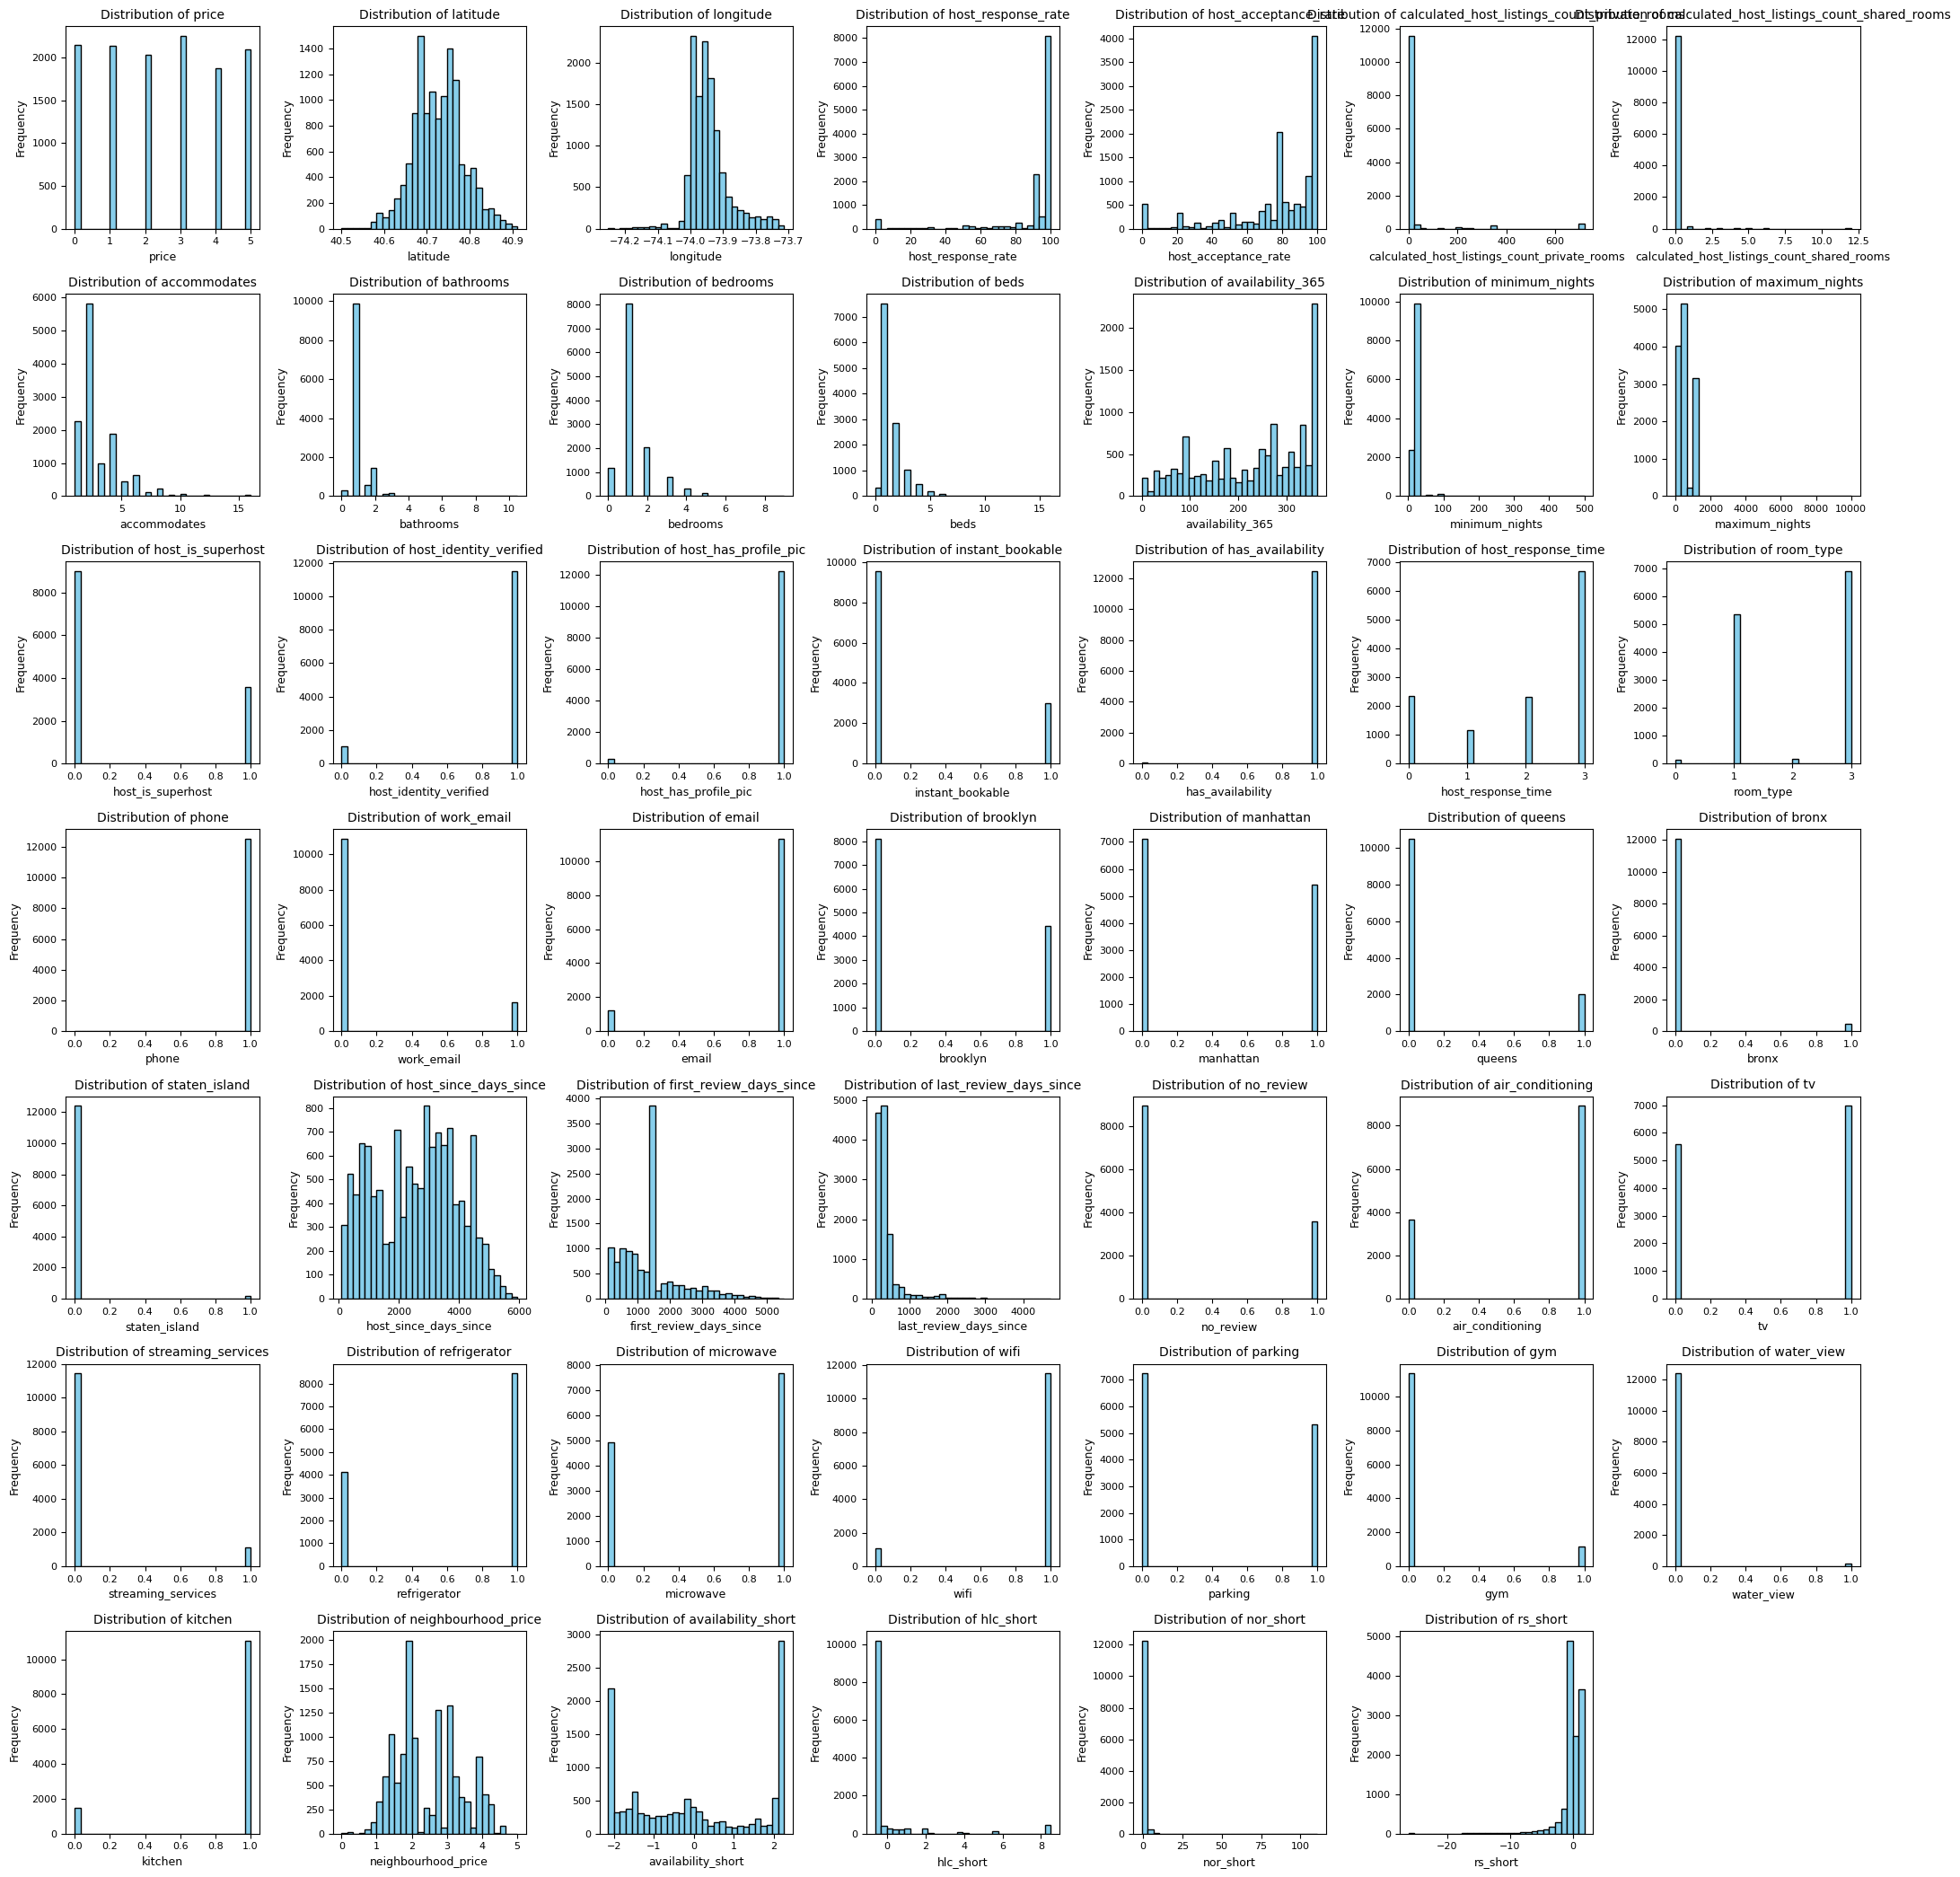

In [7]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
num_plots = len(numeric_columns)
plots_per_row = 7
num_full_rows = num_plots // plots_per_row
remaining_plots = num_plots % plots_per_row
total_rows = num_full_rows + (1 if remaining_plots > 0 else 0)

fig, axes = plt.subplots(total_rows, plots_per_row, figsize=(plots_per_row*3, total_rows*3))
axes = axes.flatten()

for idx, column in enumerate(numeric_columns):
    ax = axes[idx]
    ax.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.set_title(f'Distribution of {column}', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

for idx in range(num_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

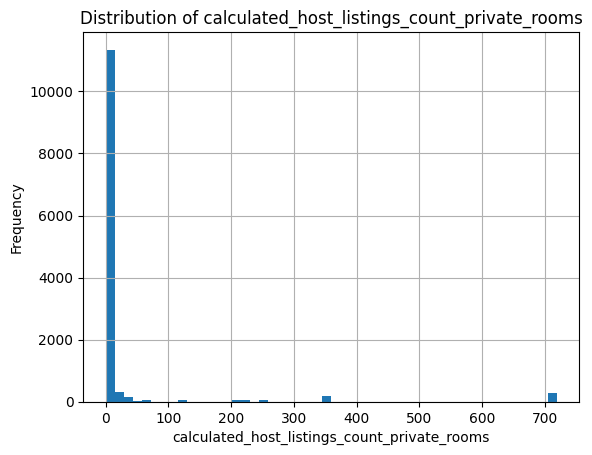

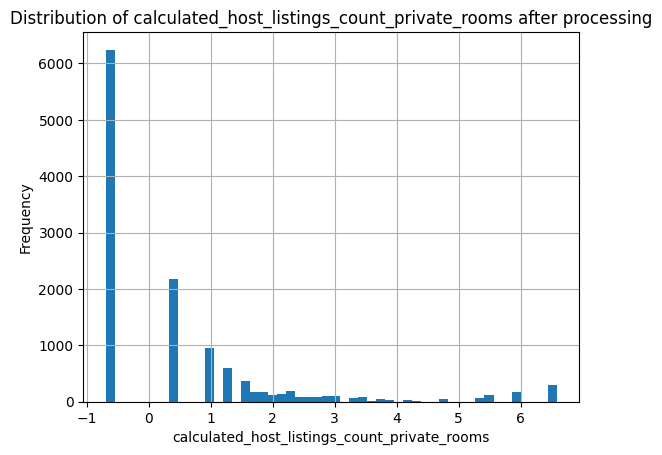

In [ ]:
df['calculated_host_listings_count_private_rooms'].hist(bins=50)
plt.xlabel('calculated_host_listings_count_private_rooms')
plt.ylabel('Frequency')
plt.title('Distribution of calculated_host_listings_count_private_rooms')
plt.show()

np.log(df['calculated_host_listings_count_private_rooms'] + 0.5).hist(bins=50)
plt.xlabel('calculated_host_listings_count_private_rooms')
plt.ylabel('Frequency')
plt.title('Distribution of calculated_host_listings_count_private_rooms after processing')
plt.show()

for df_part in [processed_train_df, processed_test_df, processed_final_train_df, processed_predictive_df]:
    df_part['calculated_host_listings_count_private_rooms'] = np.log(df_part['calculated_host_listings_count_private_rooms'] + 0.5)

30.0
1124.0


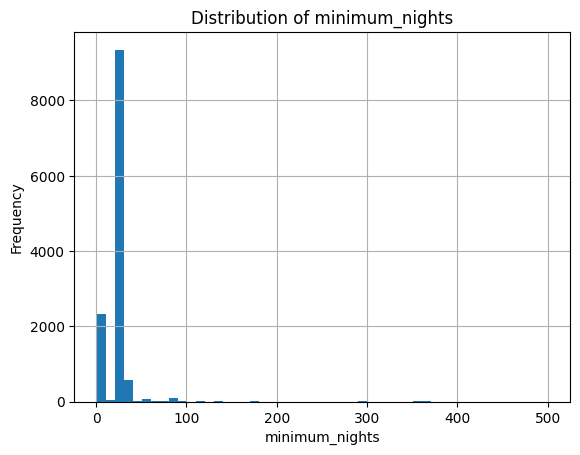

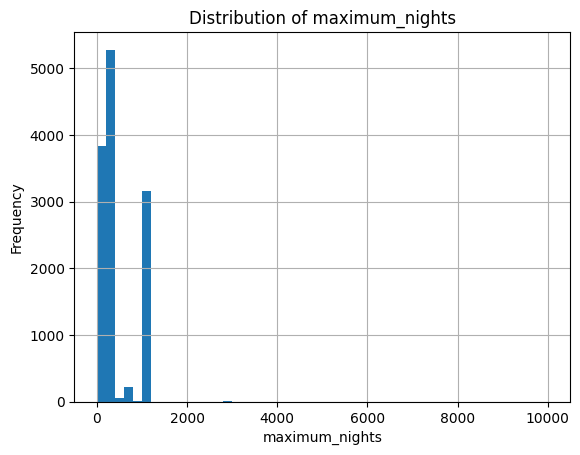

In [ ]:
print(df['minimum_nights'].quantile(0.75))
print(df['maximum_nights'].quantile(0.75))

df['minimum_nights'].hist(bins=50)
plt.xlabel('minimum_nights')
plt.ylabel('Frequency')
plt.title('Distribution of minimum_nights')
plt.show()

df['maximum_nights'].hist(bins=50)
plt.xlabel('maximum_nights')
plt.ylabel('Frequency')
plt.title('Distribution of maximum_nights')
plt.show()

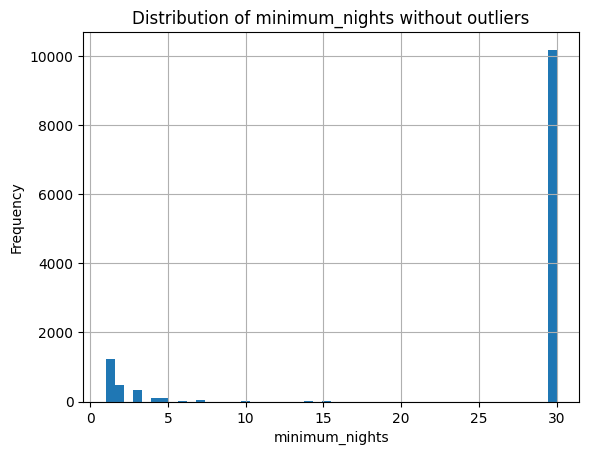

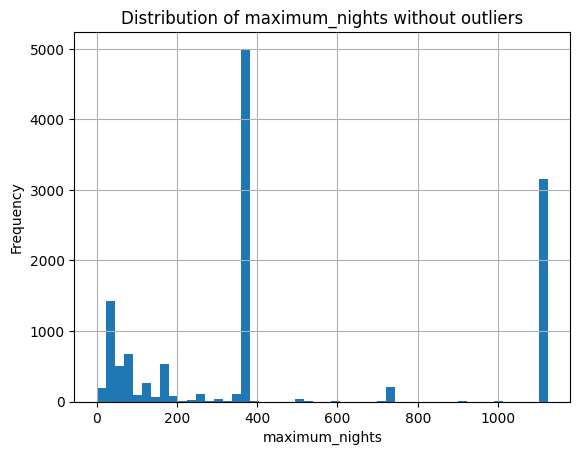

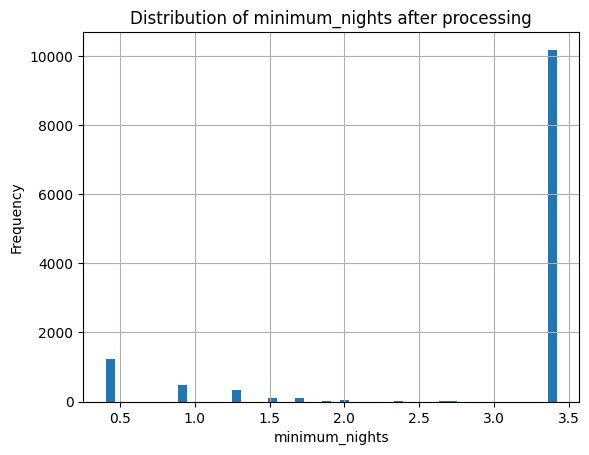

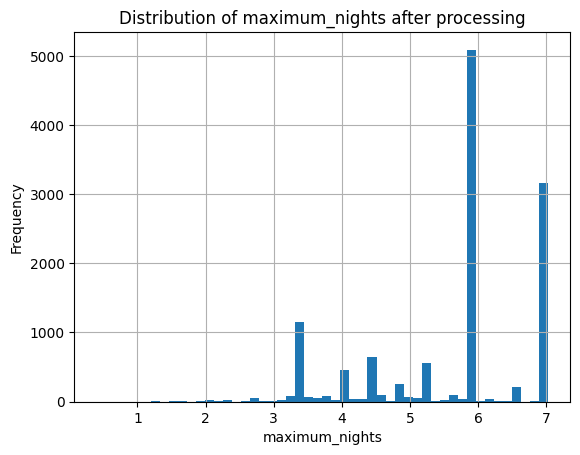

In [ ]:
for df_part in [processed_train_df, processed_test_df, processed_final_train_df, processed_predictive_df]:
    df_part['minimum_nights'] = df_part['minimum_nights'].apply(lambda x: 30 if x > 30 else x)
    df_part['maximum_nights'] = df_part['maximum_nights'].apply(lambda x: 1124 if x > 1124 else x)

df['minimum_nights'] = df['minimum_nights'].apply(lambda x: 30 if x > 30 else x)
df['maximum_nights'] = df['maximum_nights'].apply(lambda x: 1124 if x > 1124 else x)


df['minimum_nights'].hist(bins=50)
plt.xlabel('minimum_nights')
plt.ylabel('Frequency')
plt.title('Distribution of minimum_nights without outliers')
plt.show()

df['maximum_nights'].hist(bins=50)
plt.xlabel('maximum_nights')
plt.ylabel('Frequency')
plt.title('Distribution of maximum_nights without outliers')
plt.show()


np.log(df['minimum_nights'] + 0.5).hist(bins=50)
plt.xlabel('minimum_nights')
plt.ylabel('Frequency')
plt.title('Distribution of minimum_nights after processing')
plt.show()

np.log(df['maximum_nights'] + 0.5).hist(bins=50)
plt.xlabel('maximum_nights')
plt.ylabel('Frequency')
plt.title('Distribution of maximum_nights after processing')
plt.show()

In [ ]:
for df_part in [processed_train_df, processed_test_df, processed_final_train_df, processed_predictive_df]:
    df_part.drop('calculated_host_listings_count_shared_rooms', axis=1, inplace=True)
    df_part.drop('has_availability', axis=1, inplace=True)
    df_part.drop('work_email', axis=1, inplace=True)

In [11]:
# ----------------- Save Data -----------------
print('Saving data...')

processed_train_csv_path = '../data/processed/5_outliers/train.csv'
processed_test_csv_path = '../data/processed/5_outliers/test.csv'
processed_final_train_csv_path = '../data/processed/5_outliers/final_train.csv'
processed_predictive_csv_path = '../data/processed/5_outliers/predictive.csv'

processed_train_df.to_csv(processed_train_csv_path, index=False)
processed_test_df.to_csv(processed_test_csv_path, index=False)
processed_final_train_df.to_csv(processed_final_train_csv_path, index=False)
processed_predictive_df.to_csv(processed_predictive_csv_path, index=False)

Saving data...
